In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Crude_Oil.csv')

In [5]:
data.head()

,Date,Price
0,Jan-2000,25.51
1,Feb-2000,27.78
2,Mar-2000,27.49
3,Apr-2000,22.76
4,May-2000,27.74


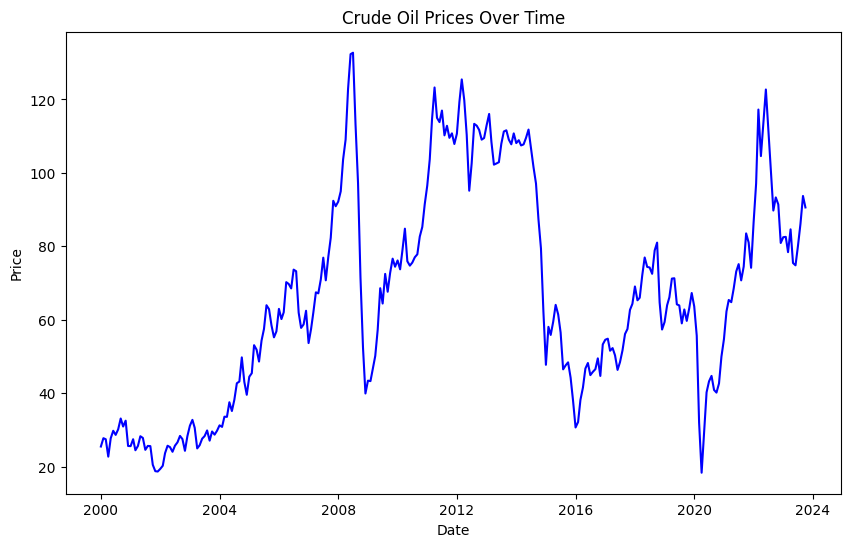

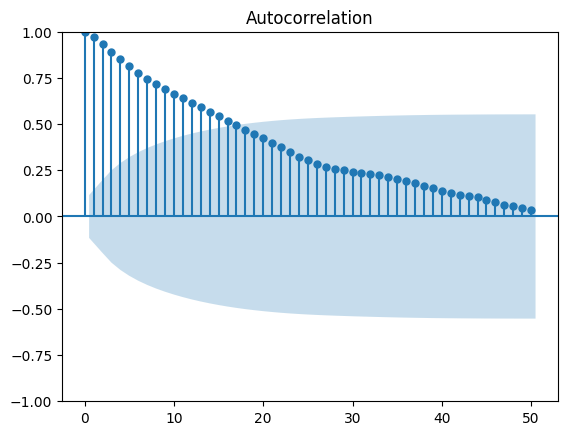

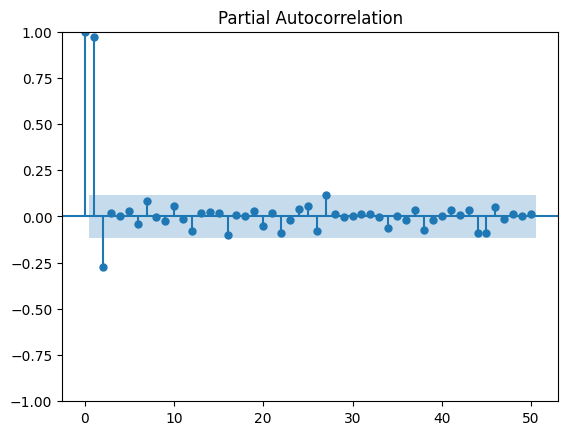

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     66.44
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           2.06e-14
Time:                        11:22:06   Log-Likelihood:                -1126.6
No. Observations:                 240   AIC:                             2257.
Df Residuals:                     238   BIC:                             2264.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4529      3.418     11.836      0.0

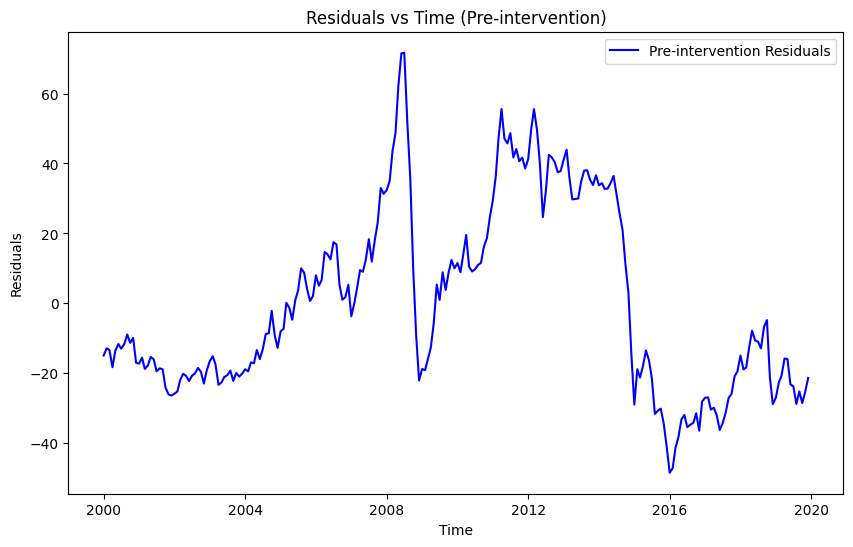

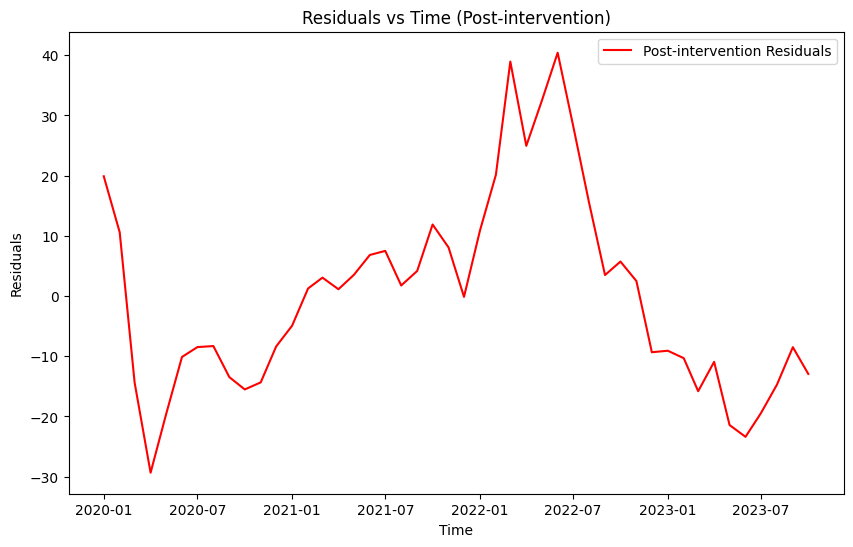

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


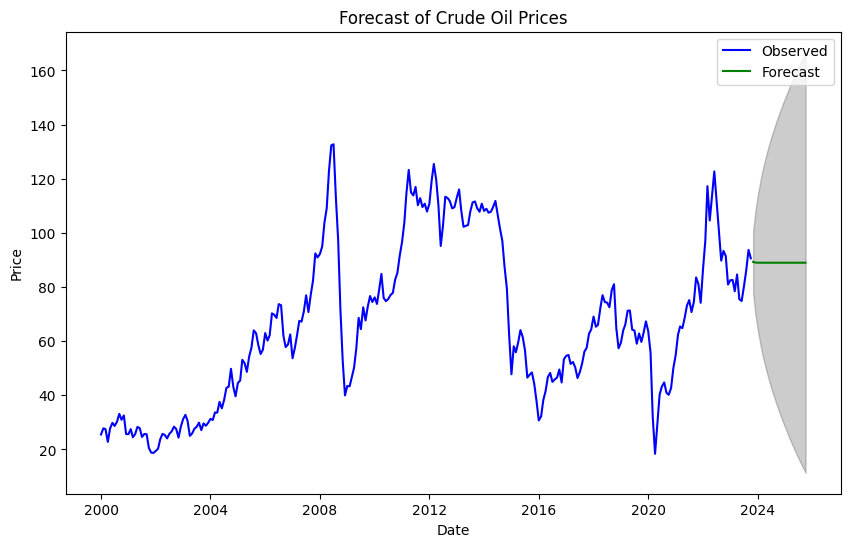

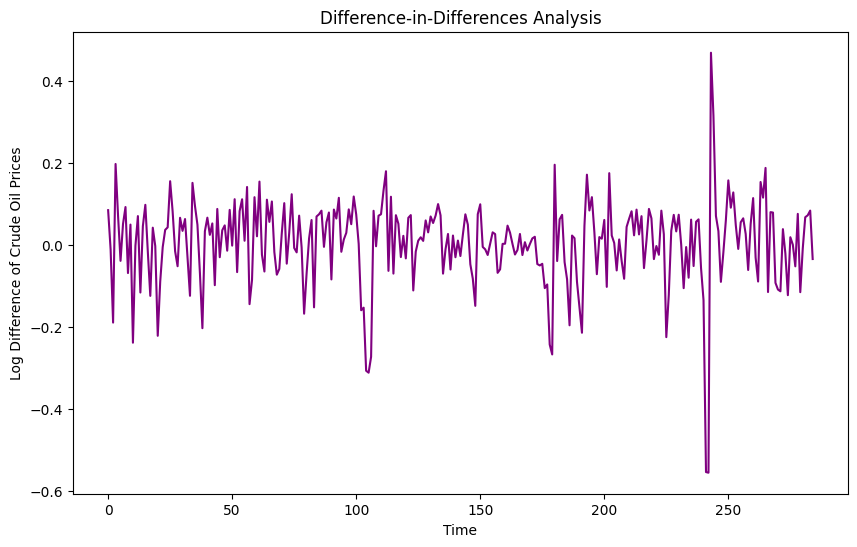

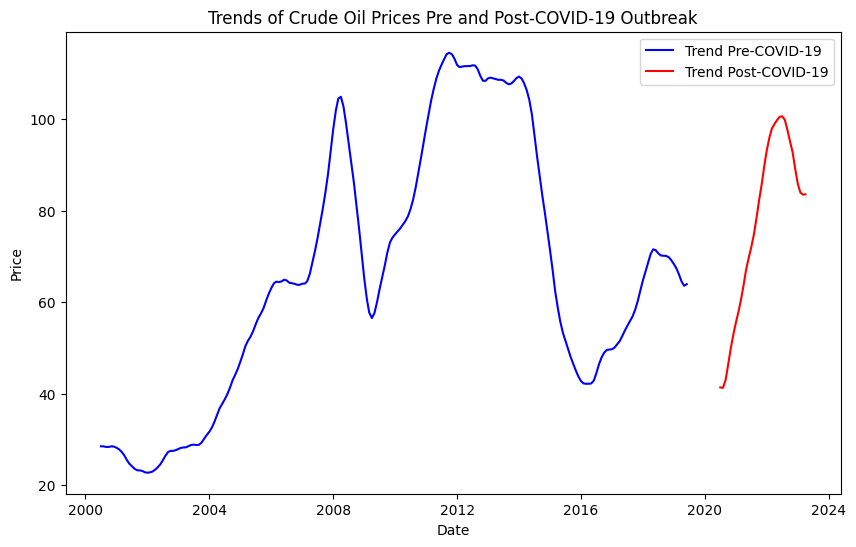

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     38.75
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.33e-15
Time:                        11:22:11   Log-Likelihood:                -1336.6
No. Observations:                 286   AIC:                             2679.
Df Residuals:                     283   BIC:                             2690.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0417      3.330     12.025      0.0

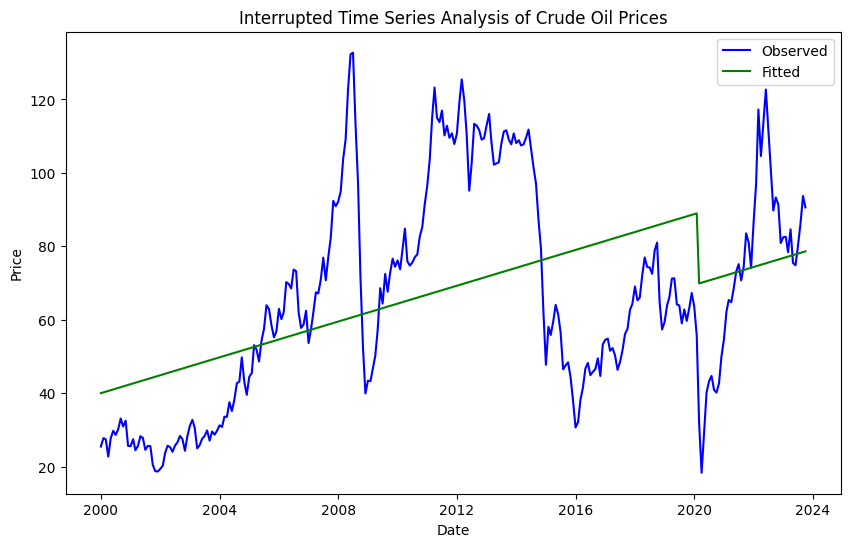

Correlation between COVID-19 interventions and crude oil prices: 0.12053493661572655


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                  286
Model:               MarkovRegression   Log Likelihood               -1233.196
Date:                Wed, 03 Jul 2024   AIC                           2478.393
Time:                        11:22:12   BIC                           2500.329
Sample:                    01-01-2000   HQIC                          2487.185
                         - 10-01-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4260      0.593     46.247      0.000      26.264      28.588
sigma2        15.5982      3.626      4.302      0.0

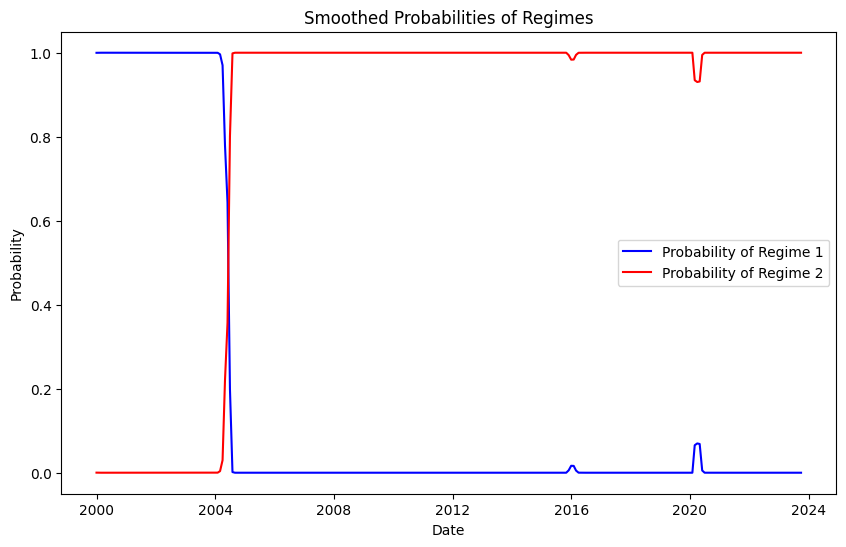

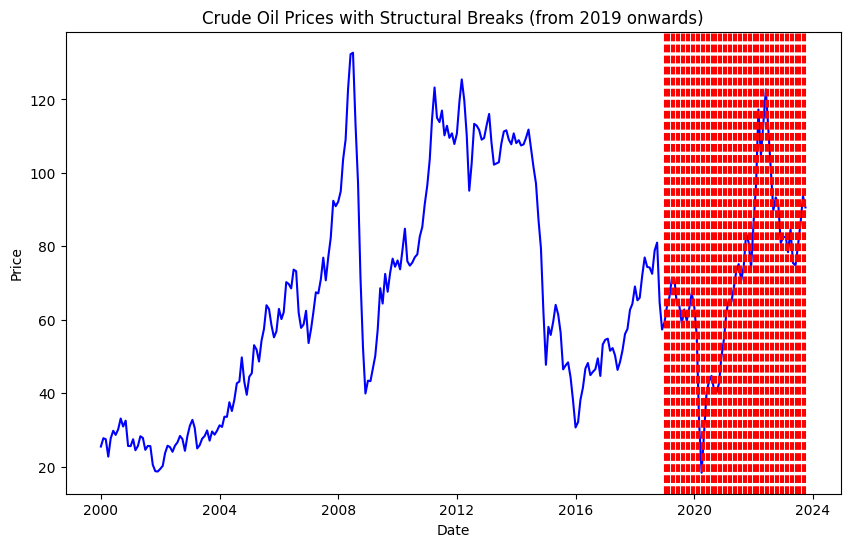

In [19]:
# Install and import necessary libraries
!pip install --upgrade statsmodels arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Crude_Oil.csv')

# Convert the date column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%b-%Y')
data.set_index('Date', inplace=True)

# Convert the dataset to a time series object
ts_data = data['Price']

# Step 3: Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(ts_data, color='blue')
plt.title('Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Check ACF and PACF
plot_acf(ts_data, lags=50)
plot_pacf(ts_data, lags=50)
plt.show()

# Step 4: Split the data into pre and post-intervention periods
pre_intervention = ts_data[:'2019-12']
post_intervention = ts_data['2020-01':]

# Step 5: Fit separate regression models for each period
pre_model = sm.OLS(pre_intervention, sm.add_constant(np.arange(len(pre_intervention)))).fit()
post_model = sm.OLS(post_intervention, sm.add_constant(np.arange(len(post_intervention)))).fit()

# Step 6: Compare coefficients and test for significance
print(pre_model.summary())
print(post_model.summary())

# Check diagnostic plots for regression models
plt.figure(figsize=(10, 6))
plt.plot(pre_model.resid, label='Pre-intervention Residuals', color='blue')
plt.title('Residuals vs Time (Pre-intervention)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(post_model.resid, label='Post-intervention Residuals', color='red')
plt.title('Residuals vs Time (Post-intervention)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Step 7: Fit the interrupted time series model
its_model = ARIMA(ts_data, order=(1, 1, 1)).fit()

# Plot forecast of crude oil prices
its_forecast = its_model.get_forecast(steps=24)
its_pred = its_forecast.predicted_mean
its_ci = its_forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Observed', color='blue')
plt.plot(its_pred, label='Forecast', color='green')
plt.fill_between(its_ci.index, its_ci.iloc[:, 0], its_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('Forecast of Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 8: Quantify the immediate and sustained impact of COVID-19 pandemic on crude oil prices
# Difference-in-differences analysis
diff_in_diff = np.diff(np.log(ts_data))
plt.figure(figsize=(10, 6))
plt.plot(diff_in_diff, color='purple')
plt.title('Difference-in-Differences Analysis')
plt.xlabel('Time')
plt.ylabel('Log Difference of Crude Oil Prices')
plt.show()

# Decompose the time series to extract the trend component
pre_decomp = seasonal_decompose(pre_intervention, model='multiplicative')
post_decomp = seasonal_decompose(post_intervention, model='multiplicative')

trend_pre = pre_decomp.trend.dropna()
trend_post = post_decomp.trend.dropna()

# Plot the trend lines
plt.figure(figsize=(10, 6))
plt.plot(trend_pre, label='Trend Pre-COVID-19', color='blue')
plt.plot(trend_post, label='Trend Post-COVID-19', color='red')
plt.title('Trends of Crude Oil Prices Pre and Post-COVID-19 Outbreak')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 9: Establish correlation between timeline of COVID-19 interventions and subsequent changes in crude oil prices
# Create a variable indicating the intervention
intervention_point = np.where(ts_data.index >= '2020-03-01', 1, 0)

# Fit the interrupted time series model using OLS
its_model = sm.OLS(ts_data, sm.add_constant(np.column_stack([np.arange(len(ts_data)), intervention_point]))).fit()

# Summarize the model
print(its_model.summary())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Observed', color='blue')
plt.plot(its_model.fittedvalues, label='Fitted', color='green')
plt.title('Interrupted Time Series Analysis of Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate correlation between COVID-19 interventions and crude oil prices
correlation = np.corrcoef(ts_data, intervention_point)[0, 1]
print(f'Correlation between COVID-19 interventions and crude oil prices: {correlation}')

# Step 10: Structural break analysis using Markov Switching model
# Fit Markov Switching model to detect structural breaks
mod = MarkovRegression(ts_data, k_regimes=2, trend='c', switching_variance=True)
res = mod.fit()

# Print the summary of the model
print(res.summary())

# Plot the smoothed probabilities of the different regimes
plt.figure(figsize=(10, 6))
plt.plot(res.smoothed_marginal_probabilities[0], label='Probability of Regime 1', color='blue')
plt.plot(res.smoothed_marginal_probabilities[1], label='Probability of Regime 2', color='red')
plt.title('Smoothed Probabilities of Regimes')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Step 11: Plot the crude oil prices with structural breaks from 2019 onwards
# Plot the time series with breakpoints starting from 2019
breakpoints_dates = ts_data.index[res.smoothed_marginal_probabilities[1] > 0.5]

# Filter breakpoints to only include those from 2019 onwards
breakpoints_dates_from_2019 = breakpoints_dates[breakpoints_dates >= '2019-01-01']

plt.figure(figsize=(10, 6))
plt.plot(ts_data, color='blue')
for date in breakpoints_dates_from_2019:
    plt.axvline(x=date, color='red', linestyle='--')
plt.title('Crude Oil Prices with Structural Breaks (from 2019 onwards)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# New section

Section 1: Install and Import Necessary Libraries

In [20]:
# Install and import necessary libraries
!pip install --upgrade statsmodels arch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression


Section 2: Load and Preprocess the Dataset

In [21]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Crude_Oil.csv')

# Convert the date column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%b-%Y')
data.set_index('Date', inplace=True)

# Convert the dataset to a time series object
ts_data = data['Price']


Section 3: Visualize the Time Series Data

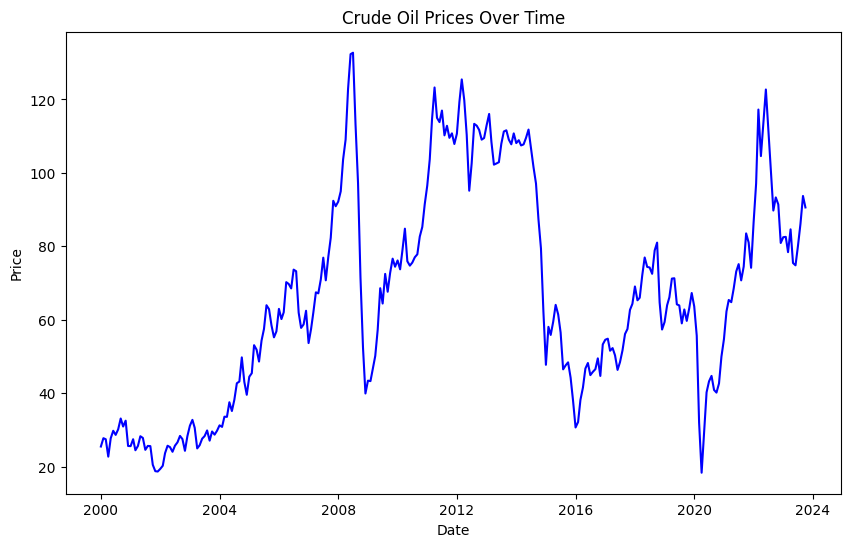

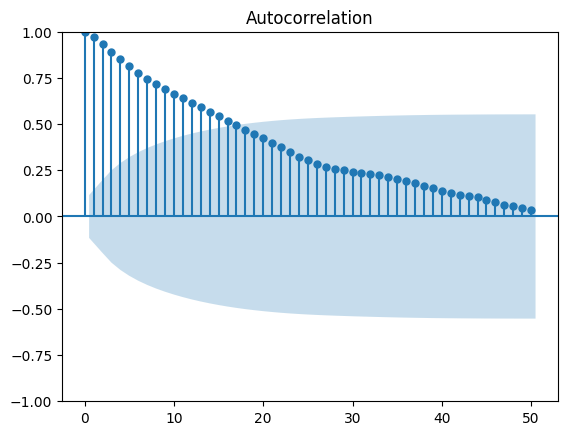

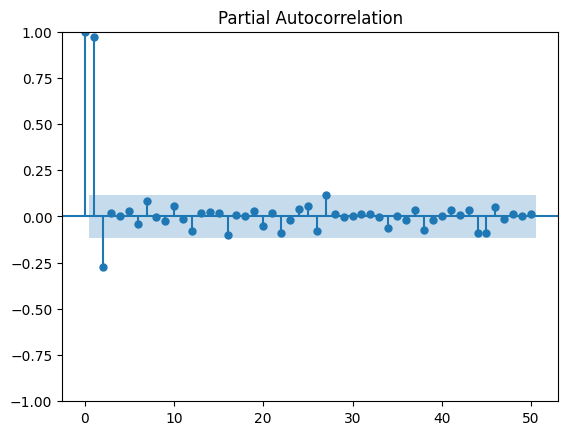

In [22]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(ts_data, color='blue')
plt.title('Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Check ACF and PACF
plot_acf(ts_data, lags=50)
plot_pacf(ts_data, lags=50)
plt.show()


Section 4: Split the Data into Pre and Post-Intervention Periods

In [23]:
# Split the data into pre and post-intervention periods
pre_intervention = ts_data[:'2019-12']
post_intervention = ts_data['2020-01':]


Section 5: Fit Separate Regression Models for Each Period

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     66.44
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           2.06e-14
Time:                        11:28:42   Log-Likelihood:                -1126.6
No. Observations:                 240   AIC:                             2257.
Df Residuals:                     238   BIC:                             2264.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4529      3.418     11.836      0.0

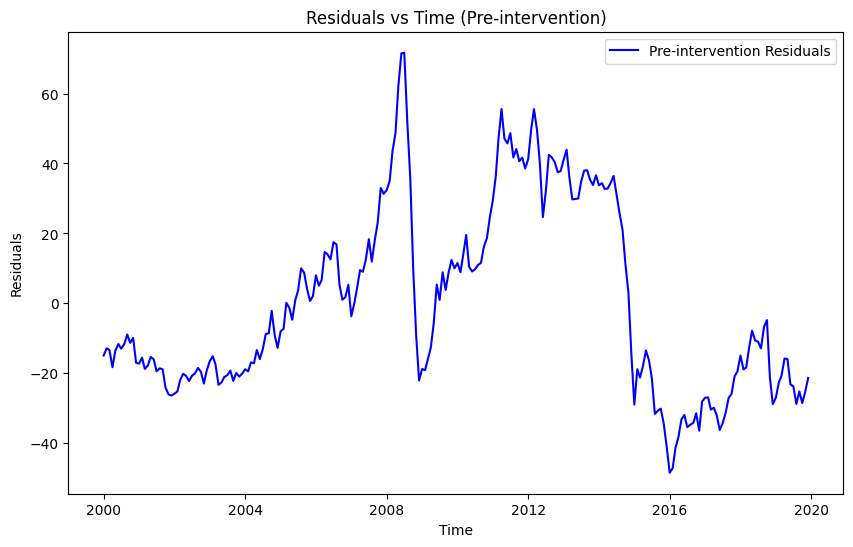

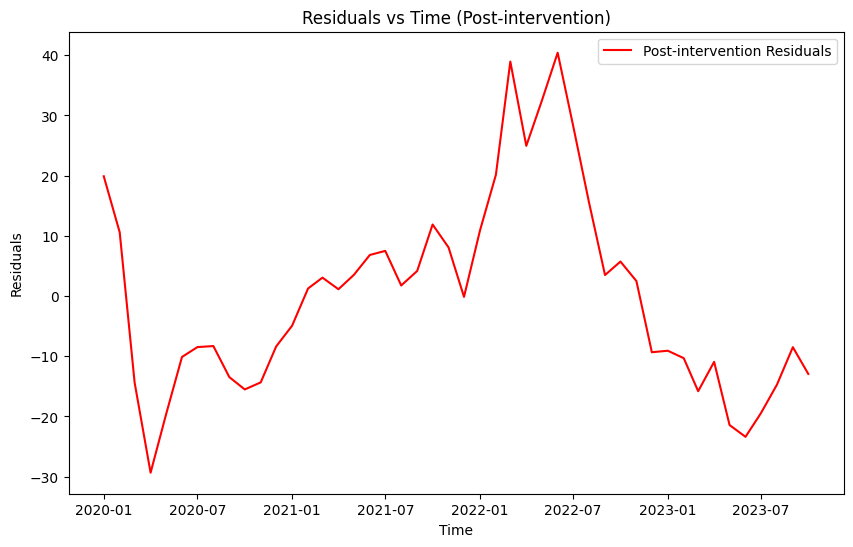

In [24]:
# Fit separate regression models for each period
pre_model = sm.OLS(pre_intervention, sm.add_constant(np.arange(len(pre_intervention)))).fit()
post_model = sm.OLS(post_intervention, sm.add_constant(np.arange(len(post_intervention)))).fit()

# Compare coefficients and test for significance
print(pre_model.summary())
print(post_model.summary())

# Check diagnostic plots for regression models
plt.figure(figsize=(10, 6))
plt.plot(pre_model.resid, label='Pre-intervention Residuals', color='blue')
plt.title('Residuals vs Time (Pre-intervention)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(post_model.resid, label='Post-intervention Residuals', color='red')
plt.title('Residuals vs Time (Post-intervention)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


Section 6: Fit the Interrupted Time Series Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


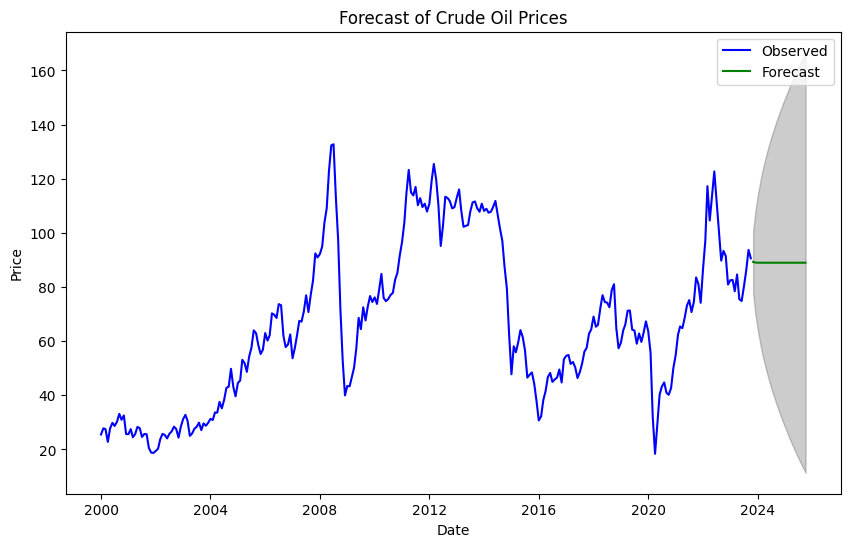

In [25]:
# Fit the interrupted time series model
its_model = ARIMA(ts_data, order=(1, 1, 1)).fit()

# Plot forecast of crude oil prices
its_forecast = its_model.get_forecast(steps=24)
its_pred = its_forecast.predicted_mean
its_ci = its_forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Observed', color='blue')
plt.plot(its_pred, label='Forecast', color='green')
plt.fill_between(its_ci.index, its_ci.iloc[:, 0], its_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('Forecast of Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Section 7: Quantify the Immediate and Sustained Impact of COVID-19 on Crude Oil Prices

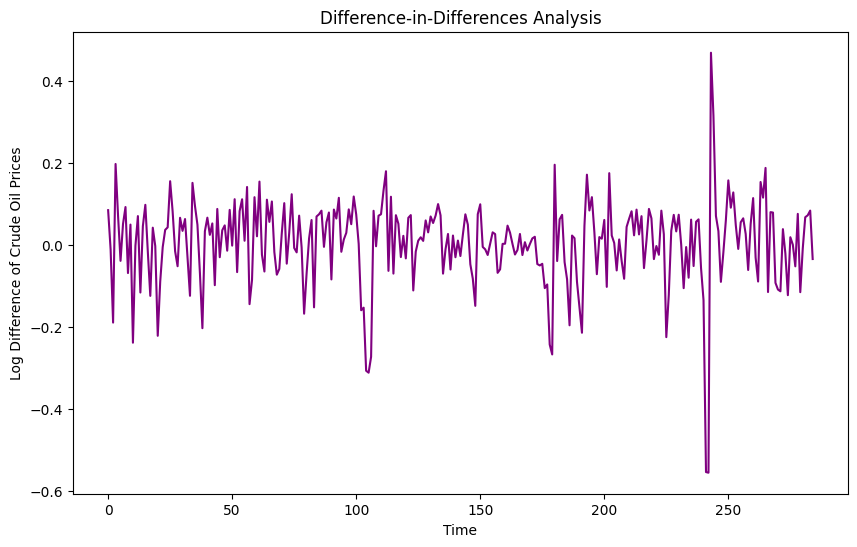

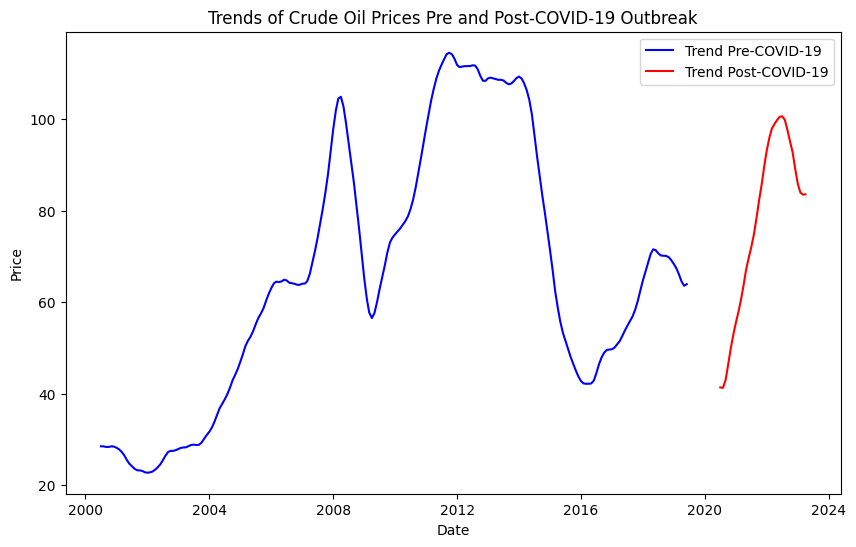

In [26]:
# Difference-in-differences analysis
diff_in_diff = np.diff(np.log(ts_data))
plt.figure(figsize=(10, 6))
plt.plot(diff_in_diff, color='purple')
plt.title('Difference-in-Differences Analysis')
plt.xlabel('Time')
plt.ylabel('Log Difference of Crude Oil Prices')
plt.show()

# Decompose the time series to extract the trend component
pre_decomp = seasonal_decompose(pre_intervention, model='multiplicative')
post_decomp = seasonal_decompose(post_intervention, model='multiplicative')

trend_pre = pre_decomp.trend.dropna()
trend_post = post_decomp.trend.dropna()

# Plot the trend lines
plt.figure(figsize=(10, 6))
plt.plot(trend_pre, label='Trend Pre-COVID-19', color='blue')
plt.plot(trend_post, label='Trend Post-COVID-19', color='red')
plt.title('Trends of Crude Oil Prices Pre and Post-COVID-19 Outbreak')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Section 8: Establish Correlation Between COVID-19 Interventions and Crude Oil Prices

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     38.75
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.33e-15
Time:                        11:30:08   Log-Likelihood:                -1336.6
No. Observations:                 286   AIC:                             2679.
Df Residuals:                     283   BIC:                             2690.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0417      3.330     12.025      0.0

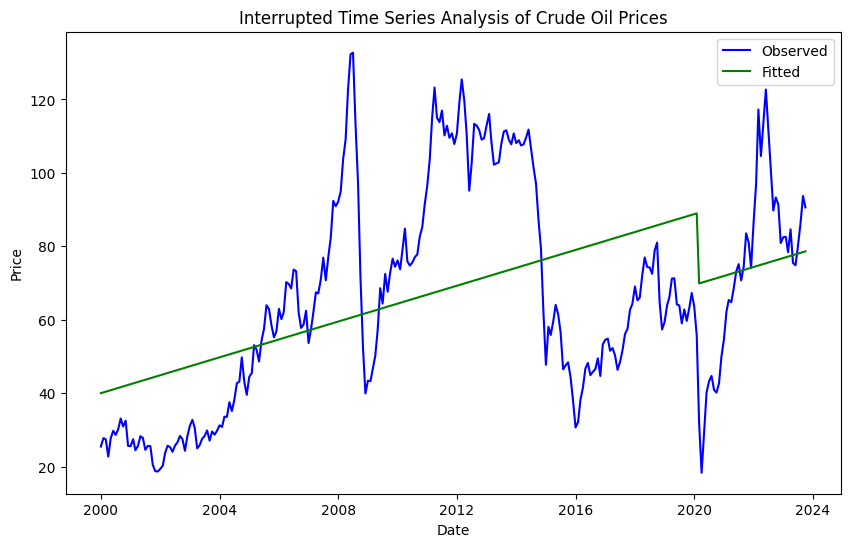

Correlation between COVID-19 interventions and crude oil prices: 0.12053493661572655


In [27]:
# Create a variable indicating the intervention
intervention_point = np.where(ts_data.index >= '2020-03-01', 1, 0)

# Fit the interrupted time series model using OLS
its_model = sm.OLS(ts_data, sm.add_constant(np.column_stack([np.arange(len(ts_data)), intervention_point]))).fit()

# Summarize the model
print(its_model.summary())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Observed', color='blue')
plt.plot(its_model.fittedvalues, label='Fitted', color='green')
plt.title('Interrupted Time Series Analysis of Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate correlation between COVID-19 interventions and crude oil prices
correlation = np.corrcoef(ts_data, intervention_point)[0, 1]
print(f'Correlation between COVID-19 interventions and crude oil prices: {correlation}')


Section 9: Structural Break Analysis Using Markov Switching Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                  286
Model:               MarkovRegression   Log Likelihood               -1233.196
Date:                Wed, 03 Jul 2024   AIC                           2478.393
Time:                        11:30:32   BIC                           2500.329
Sample:                    01-01-2000   HQIC                          2487.185
                         - 10-01-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4260      0.593     46.247      0.000      26.264      28.588
sigma2        15.5982      3.626      4.302      0.0

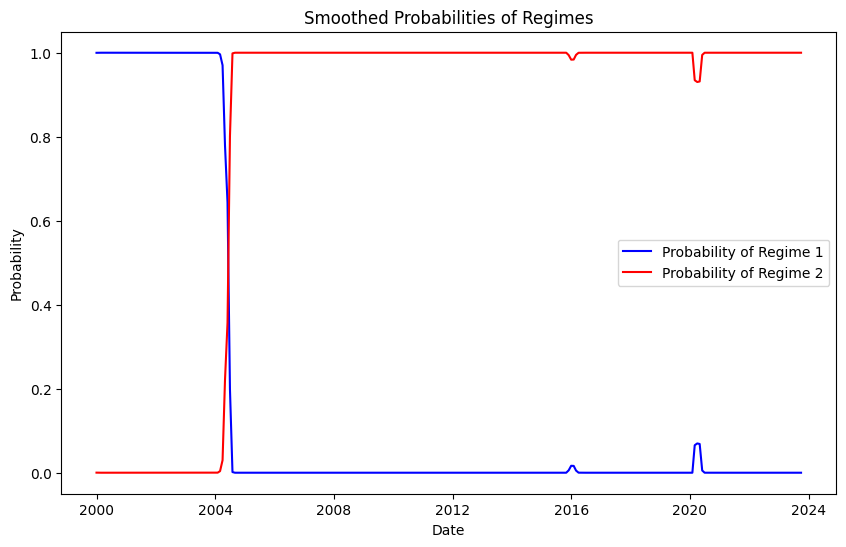

In [28]:
# Fit Markov Switching model to detect structural breaks
mod = MarkovRegression(ts_data, k_regimes=2, trend='c', switching_variance=True)
res = mod.fit()

# Print the summary of the model
print(res.summary())

# Plot the smoothed probabilities of the different regimes
plt.figure(figsize=(10, 6))
plt.plot(res.smoothed_marginal_probabilities[0], label='Probability of Regime 1', color='blue')
plt.plot(res.smoothed_marginal_probabilities[1], label='Probability of Regime 2', color='red')
plt.title('Smoothed Probabilities of Regimes')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.legend()
plt.show()


Section 10: Plot the Crude Oil Prices with Structural Breaks from 2019 Onwards

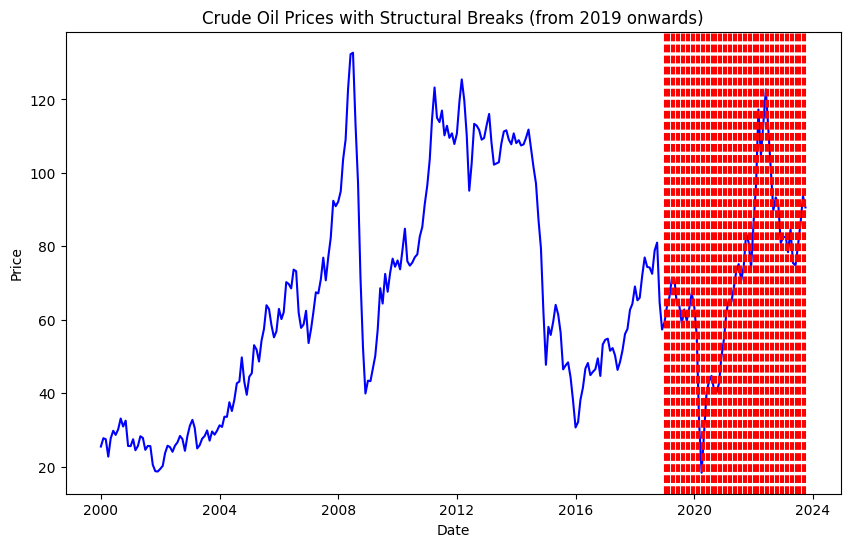

In [29]:
# Plot the time series with breakpoints starting from 2019
breakpoints_dates = ts_data.index[res.smoothed_marginal_probabilities[1] > 0.5]

# Filter breakpoints to only include those from 2019 onwards
breakpoints_dates_from_2019 = breakpoints_dates[breakpoints_dates >= '2019-01-01']

plt.figure(figsize=(10, 6))
plt.plot(ts_data, color='blue')
for date in breakpoints_dates_from_2019:
    plt.axvline(x=date, color='red', linestyle='--')
plt.title('Crude Oil Prices with Structural Breaks (from 2019 onwards)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
